In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
import glob

In [3]:
arr=[]
path = '/home/mohit/Desktop/ml project mustafi sir/pos/*.txt'
files = glob.glob(path)
for name in files:
    with open(name) as f:
     arr.append(f.read())       
   

In [4]:
len(arr)

1000

In [5]:
arr2=[]
path = '/home/mohit/Desktop/ml project mustafi sir/neg/*.txt'
file = glob.glob(path)
for name in file:
    with open(name) as f:
        #print("p")
        arr2.append(f.read())       
   

In [6]:
len(arr2)

1000

In [7]:
df = pd.DataFrame(arr,columns=['text'])
n=50

In [8]:
df = df.head(n)

In [9]:
df1 = pd.DataFrame(arr2,columns=['text'])

In [10]:
df1 = df.head(n)

In [11]:
df = df.append(df1)

In [12]:
df.shape

(100, 1)

In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:
df.head(5)

,text
0,"after a rather disappointing "" mary railly "" ,..."
1,look back at all the times in your life when t...
2,it must be tough to be a mob boss . \njust ask...
3,"capsule : earthy , experimental , difficult , ..."
4,"when jim henson passed away , he left behind d..."


In [15]:
#remove email id
def rem_email(col):
    text=col[0]
    text=re.sub(r'\S*@\S*\s?',"",text)
    return text
df['text']=df[['text']].apply(rem_email,axis=1)

In [16]:
#removal of special characters
def rem_special(col):
    text=col[0]
    text=re.sub(r'[^A-Za-z0-9]+'," ",text)
    return text
df['text']=df[['text']].apply(rem_special,axis=1)

In [17]:
def rem_dig(col):
    text=col[0]
    text=re.sub(r'\d+',"",text)
    return text
df['text']=df[['text']].apply(rem_dig,axis=1)

In [18]:
#conversion to lowercase
def con_tolower(col):
    text=col[0]
    text=text.lower()
    return text
df['text']=df[['text']].apply(con_tolower,axis=1)

In [19]:
df.head(20)

,text
0,after a rather disappointing mary railly steph...
1,look back at all the times in your life when t...
2,it must be tough to be a mob boss just ask pau...
3,capsule earthy experimental difficult shocking...
4,when jim henson passed away he left behind div...
5,synopsis in this movie steven spielberg one of...
6,quiz show an almost perfectly accurate true st...
7,the first thing you notice about this movie is...
8,plot a group of asbestos cleaners get a job re...
9,the coen brothers are back again this time wit...


In [20]:
from nltk.corpus import stopwords
set1=set(stopwords.words('english'))

In [21]:
from nltk.tokenize import word_tokenize
def stop_words1(col):
    text=col[0]
    word_tokens = word_tokenize(text)
    return word_tokens
df['text']=df[['text']].apply(stop_words1,axis=1)

In [22]:
df['text'].head()

0    [after, a, rather, disappointing, mary, railly...
1    [look, back, at, all, the, times, in, your, li...
2    [it, must, be, tough, to, be, a, mob, boss, ju...
3    [capsule, earthy, experimental, difficult, sho...
4    [when, jim, henson, passed, away, he, left, be...
Name: text, dtype: object

In [23]:
def capping(col):
    text=col[0]
    text_new=[]
    for i in text:
        if(len(i)<=2 or len(i)>=13):
            continue
        else:
            text_new.append(i)
    return text_new
df['text']=df[['text']].apply(capping,axis=1)

In [24]:
df['text']

0     [after, rather, mary, railly, stephen, frears,...
1     [look, back, all, the, times, your, life, when...
2     [must, tough, mob, boss, just, ask, paul, vitt...
3     [capsule, earthy, experimental, difficult, sho...
4     [when, jim, henson, passed, away, left, behind...
5     [synopsis, this, movie, steven, spielberg, one...
6     [quiz, show, almost, perfectly, accurate, true...
7     [the, first, thing, you, notice, about, this, ...
8     [plot, group, asbestos, cleaners, get, job, re...
9     [the, coen, brothers, are, back, again, this, ...
10    [why, many, children, films, treat, their, tar...
11    [one, the, last, entries, the, long, running, ...
12    [ingredients, neophyte, lawyer, legal, situati...
13    [relish, those, rare, when, talented, screenwr...
14    [movie, that, been, highly, built, the, truman...
15    [people, who, enjoy, science, fiction, are, of...
16    [been, good, long, while, since, had, good, ol...
17    [dangerous, beauty, really, nothing, more,

In [25]:
from nltk.tokenize import word_tokenize
def stop_words1(col):
    text=col[0]
    word_tokens = text
    filtered=[]
    for i in range(0,len(word_tokens)-1):
        temp1=word_tokens[i];
        temp2=word_tokens[i+1];
        if temp1 in set1 or temp2 in set1:
            continue
        filtered.append((temp1,temp2))
    return filtered
df['text']=df[['text']].apply(stop_words1,axis=1)

In [26]:
df['text'].head()

0    [(rather, mary), (mary, railly), (railly, step...
1    [(look, back), (sort, decision), (better, wors...
2    [(must, tough), (tough, mob), (mob, boss), (as...
3    [(capsule, earthy), (earthy, experimental), (e...
4    [(jim, henson), (henson, passed), (passed, awa...
Name: text, dtype: object

In [27]:
global anst

In [28]:
anst=0

In [29]:
set1=set()
lst=[]
def push_in_set(col):
    text=col[0]
    set1.update(text)
    for i in text:
        lst.append(i)
df[['text']].apply(push_in_set,axis=1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
      ... 
70    None
71    None
72    None
73    None
74    None
75    None
76    None
77    None
78    None
79    None
80    None
81    None
82    None
83    None
84    None
85    None
86    None
87    None
88    None
89    None
90    None
91    None
92    None
93    None
94    None
95    None
96    None
97    None
98    None
99    None
Length: 100, dtype: object

In [30]:
len(set1)

10068

In [31]:
len(lst)

21490

In [32]:
set1

{('portrait', 'aging'),
 ('town', 'sheriff'),
 ('gives', 'message'),
 ('piece', 'paper'),
 ('bunch', 'saintly'),
 ('comes', 'loaded'),
 ('wall', 'things'),
 ('inner', 'kid'),
 ('rainmaker', 'brilliant'),
 ('reed', 'veronica'),
 ('vitti', 'something'),
 ('behind', 'diverse'),
 ('blockbuster', 'hits'),
 ('one', 'might'),
 ('three', 'day'),
 ('film', 'tries'),
 ('extremely', 'clever'),
 ('enjoy', 'let'),
 ('rules', 'meticulous'),
 ('beauty', 'really'),
 ('new', 'line'),
 ('omen', 'poltergeist'),
 ('simpson', 'tom'),
 ('themes', 'forbidden'),
 ('coen', 'collaborator'),
 ('vermin', 'animals'),
 ('excused', 'least'),
 ('young', 'girl'),
 ('pulled', 'front'),
 ('life', 'dividing'),
 ('title', 'credit'),
 ('time', 'got'),
 ('fraser', 'stars'),
 ('best', 'line'),
 ('consistent', 'chuckles'),
 ('present', 'obvious'),
 ('becoming', 'almost'),
 ('nomination', 'simply'),
 ('years', 'old'),
 ('brilliant', 'portraying'),
 ('use', 'crude'),
 ('industry', 'get'),
 ('regular', 'woman'),
 ('hayek', 'roun

In [33]:
len(set1)

10068

In [34]:
mat=np.zeros([df.shape[0],len(set1)])

In [35]:
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
d=dict()
k=0;
for i in set1:
    d[i]=k
    k=k+1


In [37]:
d

{('one', 'work'): 9418,
 ('portrait', 'aging'): 0,
 ('town', 'sheriff'): 1,
 ('plot', 'yes'): 5019,
 ('humorous', 'horrifying'): 9996,
 ('suite', 'always'): 9479,
 ('gives', 'message'): 2,
 ('friend', 'amanda'): 7294,
 ('demornay', 'like'): 6941,
 ('pursue', 'actors'): 5020,
 ('crime', 'dramas'): 6373,
 ('piece', 'paper'): 3,
 ('reach', 'conclusion'): 5022,
 ('others', 'fear'): 5855,
 ('bunch', 'saintly'): 4,
 ('caters', 'adults'): 9271,
 ('comes', 'loaded'): 5,
 ('wall', 'things'): 6,
 ('inner', 'kid'): 7,
 ('rainmaker', 'brilliant'): 8,
 ('audience', 'finds'): 5025,
 ('reed', 'veronica'): 9,
 ('language', 'editing'): 6036,
 ('trying', 'set'): 5026,
 ('fine', 'acting'): 5892,
 ('vitti', 'something'): 10,
 ('blockbuster', 'hits'): 12,
 ('always', 'appreciated'): 5028,
 ('reserved', 'bud'): 9692,
 ('ever', 'heard'): 9314,
 ('leasure', 'played'): 8420,
 ('one', 'might'): 13,
 ('stars', 'jim'): 5029,
 ('hustler', 'based'): 608,
 ('three', 'day'): 14,
 ('film', 'tries'): 15,
 ('good', 'act

In [38]:
def count_matrix(col,k):
    text=col
    for i in text:
        mat[k][d[i]]=mat[k][d[i]]+1
k=0
for i in df['text']:
    #print(i)
    count_matrix(i,k)
    k=k+1

In [39]:
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
mat.shape

(100, 10068)

In [41]:
#creating tf-idf
total_no_of_documents=df.shape[0]
total_no_of_words=len(set1)
tf=np.zeros([total_no_of_documents,total_no_of_words])

k=0
for i in mat:
    cnt=0
    p=0
    for j in i:
        cnt=cnt+j
    for j in i:
        tf[(k,p)]=j/cnt
        p=p+1
    k=k+1

In [42]:
import math
no_of_documents_per_word=np.zeros(total_no_of_words)
for i in mat:
    p=0
    for j in i:
        if j > 0:
            no_of_documents_per_word[p]=no_of_documents_per_word[p]+1;
        p=p+1;

idf=np.zeros(total_no_of_words)
k=0
for i in no_of_documents_per_word:
    idf[k]=math.log10(total_no_of_documents/i)
    k=k+1

In [43]:
tf_idf=np.zeros([total_no_of_documents,total_no_of_words])
k=0;
for i in mat:
    p=0;
    for j in i:
        tf_idf[(k,p)]=idf[p]*tf[k,p];
        p=p+1;
    k=k+1

In [44]:
tf_idf[:,0]
tf_idf.shape

(100, 10068)

In [45]:
for i in tf_idf:
    for j in i:
        if j == float('inf'):
            print (j)

In [46]:
mean_mat=np.zeros([1,tf_idf.shape[1]])
std_mat=np.zeros([1,tf_idf.shape[1]])
for i in range(0,tf_idf.shape[1]):
    mean_mat[0,i]=np.mean(tf_idf[:,i])
    std_mat[0,i]=np.std(tf_idf[:,i])

In [47]:
for i in range(0,std_mat.shape[0]):
    for j in range(0,std_mat.shape[1]):
        if(std_mat[i,j]==0):
            x1=i
            y1=j
            print(x1+' '+y1)

In [48]:
X=np.zeros([tf_idf.shape[0],tf_idf.shape[1]])
for i in range(0,tf_idf.shape[0]):
    for j in range(0,tf_idf.shape[1]):
        X[i,j]=(tf_idf[i,j]-mean_mat[0][j])/std_mat[0][j]

In [49]:
X[0,11]

-0.14285714285714288

In [50]:
X.shape

(100, 10068)

In [51]:
#creating covariance matrix
mean_vec=np.mean(X,axis=0)

In [52]:
mean_vec

array([ 1.88737914e-17, -6.66133815e-18,  5.10702591e-17, ...,
       -4.88498131e-17,  5.10702591e-17, -6.66133815e-18])

In [53]:
cov=np.zeros([X.shape[1],X.shape[1]])
cov= (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)

In [54]:
cov

array([[ 1.01010101, -0.02061431, -0.02061431, ..., -0.02061431,
        -0.02061431, -0.02061431],
       [-0.02061431,  1.01010101, -0.02061431, ..., -0.02061431,
        -0.02061431,  1.01010101],
       [-0.02061431, -0.02061431,  1.01010101, ..., -0.02061431,
        -0.02061431, -0.02061431],
       ...,
       [-0.02061431, -0.02061431, -0.02061431, ...,  1.01010101,
        -0.02061431, -0.02061431],
       [-0.02061431, -0.02061431, -0.02061431, ..., -0.02061431,
         1.01010101, -0.02061431],
       [-0.02061431,  1.01010101, -0.02061431, ..., -0.02061431,
        -0.02061431,  1.01010101]])

In [55]:
from sklearn.decomposition import PCA

In [56]:
eig_vals, eig_vecs = np.linalg.eig(cov)

In [57]:
eig_vals

array([ 5.43399337e+002+0.j,  4.68097243e+002+0.j,  4.12080385e+002+0.j,
       ..., -7.19151206e-146+0.j, -2.23027036e-156+0.j,
        7.19408647e-157+0.j])

In [58]:
eig_vecs

array([[-8.92689986e-04+0.j, -1.03552495e-03+0.j, -1.01014281e-03+0.j,
        ..., -2.68425492e-21+0.j,  1.34581196e-30+0.j,
         2.18479447e-31+0.j],
       [-3.27239756e-03+0.j,  4.61094436e-02+0.j,  3.26821780e-03+0.j,
        ..., -9.88816207e-19+0.j,  3.23539478e-19+0.j,
         2.31329843e-19+0.j],
       [-1.04706479e-03+0.j, -1.28933749e-03+0.j, -1.36282419e-03+0.j,
        ...,  1.73244908e-18+0.j, -2.41334911e-19+0.j,
        -1.56835259e-19+0.j],
       ...,
       [-7.61604969e-04+0.j, -8.13205762e-04+0.j, -8.87670818e-04+0.j,
        ..., -4.31304094e-19+0.j,  1.65906834e-19+0.j,
        -4.54501700e-20+0.j],
       [-7.55152759e-04+0.j, -8.33215410e-04+0.j, -8.77906132e-04+0.j,
        ...,  1.02638680e-19+0.j, -5.08221127e-20+0.j,
        -5.43230045e-20+0.j],
       [-3.27239756e-03+0.j,  4.61094436e-02+0.j,  3.26821780e-03+0.j,
        ...,  1.31544853e-18+0.j, -8.36510187e-20+0.j,
        -3.30303100e-20+0.j]])

In [59]:
eig_vecs.shape

(10068, 10068)

In [60]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print("Eigen values in descending order:")
for i in eig_pairs:
    print(i[0])

Eigen values in descending order:
543.3993369766772
468.0972429181595
412.0803853680131
379.9451930593442
361.96817977111846
309.2938368076643
304.8869731139201
293.75650013362286
285.38078514638164
278.1348631485955
271.6168948549007
250.704376338844
242.46624173385428
239.94164547458615
235.1859045921373
227.37112640298008
221.02278367527776
212.84965119065666
204.7162540302542
198.5958285730511
190.37272230854578
188.03029927263665
182.10389569488186
181.2750674849002
180.52104987030532
179.51348189784355
178.9591181214446
174.62228236106134
171.22811913721003
168.39933791421873
164.2904488985874
160.33610094505227
157.7319057711334
155.0738305037485
151.64504844909797
148.9783213333555
144.4074726435565
141.54394125070934
137.64051784243463
131.41986274421174
126.60136478114839
123.41095891444336
122.14421532601585
115.91523495024066
113.55469228152934
94.27674105184052
90.29660541557243
85.14043732543524
68.84989189579491
2.970173860575554e-13
1.0846976528656746e-13
1.084697652865

1.705557290775513e-47
1.6825690763601425e-47
1.6825690763601425e-47
1.6796145590834965e-47
1.6796145590834965e-47
1.6631332316490886e-47
1.6631332316490886e-47
1.645822248687064e-47
1.645822248687064e-47
1.6325076541900722e-47
1.6325076541900722e-47
1.5706011557620875e-47
1.5706011557620875e-47
1.5116747413481598e-47
1.5116747413481598e-47
1.5032527165010415e-47
1.5032527165010415e-47
1.4991512541232258e-47
1.4991512541232258e-47
1.4682520754999838e-47
1.4682520754999838e-47
1.4664776772375996e-47
1.4463126968204253e-47
1.4463126968204253e-47
1.4293695831308008e-47
1.4293695831308008e-47
1.4232179609549798e-47
1.4232179609549798e-47
1.397913279808215e-47
1.397913279808215e-47
1.360271248321956e-47
1.360271248321956e-47
1.3261071631719272e-47
1.3261071631719272e-47
1.296963821369948e-47
1.296963821369948e-47
1.2506854274775791e-47
1.2506854274775791e-47
1.1963394780847772e-47
1.17879641784086e-47
1.17879641784086e-47
1.171463774831209e-47
1.171463774831209e-47
1.1667266458540893e-47
1.1

5.093513197016689e-63
5.081856495163858e-63
5.081856495163858e-63
5.079010394800766e-63
5.079010394800766e-63
5.068450533679504e-63
5.050335865812519e-63
5.050335865812519e-63
4.991518301461615e-63
4.991518301461615e-63
4.966864064638635e-63
4.966864064638635e-63
4.91852889222586e-63
4.91852889222586e-63
4.692639271440227e-63
4.692639271440227e-63
4.688644542352712e-63
4.688644542352712e-63
4.671642900325837e-63
4.671642900325837e-63
4.6215909903672347e-63
4.6215909903672347e-63
4.61249991602938e-63
4.61249991602938e-63
4.5199949194823777e-63
4.5199949194823777e-63
4.499130701341866e-63
4.499130701341866e-63
4.405301232071797e-63
4.3993381528851336e-63
4.3993381528851336e-63
4.344160671046596e-63
4.344160671046596e-63
4.330764001305673e-63
4.330764001305673e-63
4.2292951182187705e-63
4.2292951182187705e-63
4.2153637188403177e-63
4.196740387909642e-63
4.196740387909642e-63
4.1570357776339854e-63
4.1570357776339854e-63
4.1035324092157285e-63
4.1035324092157285e-63
4.10108135436959e-63
4.

3.5530460497188297e-68
3.5153810292567124e-68
3.5153810292567124e-68
3.441337828469948e-68
3.441337828469948e-68
3.3812853886175465e-68
3.3812853886175465e-68
3.2099712890076328e-68
3.2099712890076328e-68
3.199869019652145e-68
3.1533351258359005e-68
3.1533351258359005e-68
3.1322198408056735e-68
3.1322198408056735e-68
2.9522394209405217e-68
2.9522394209405217e-68
2.932324403346244e-68
2.932324403346244e-68
2.7515702165849554e-68
2.7515702165849554e-68
2.7323140466494625e-68
2.7323140466494625e-68
2.6889358855104324e-68
2.6889358855104324e-68
2.5792517816289117e-68
2.5792517816289117e-68
2.3727929430558613e-68
2.3727929430558613e-68
2.353112189197513e-68
2.353112189197513e-68
2.2794167663810756e-68
2.2794167663810756e-68
2.259539545311077e-68
2.259539545311077e-68
2.2422997307568058e-68
2.2337286349606105e-68
2.2337286349606105e-68
2.2326047489985546e-68
2.2326047489985546e-68
2.180205580144187e-68
2.180205580144187e-68
2.1638273765579287e-68
2.1638273765579287e-68
2.112390760486652e-68


2.3179839283723634e-79
2.2658297252964107e-79
2.2658297252964107e-79
2.2609999945084424e-79
2.2609999945084424e-79
2.2525870410071438e-79
2.2525870410071438e-79
2.251417978568881e-79
2.251417978568881e-79
2.2498998483570938e-79
2.2498998483570938e-79
2.2292753865030338e-79
2.2292753865030338e-79
2.216984667360122e-79
2.216984667360122e-79
2.214904718624863e-79
2.214904718624863e-79
2.2124338517197127e-79
2.2124338517197127e-79
2.1881585901535158e-79
2.1881585901535158e-79
2.1814538831725356e-79
2.1814538831725356e-79
2.1804716688743508e-79
2.1804716688743508e-79
2.176718798865779e-79
2.176718798865779e-79
2.1522432944412575e-79
2.1522432944412575e-79
2.1447379534299594e-79
2.1447379534299594e-79
2.122985845471862e-79
2.122985845471862e-79
2.1188527666186386e-79
2.1188527666186386e-79
2.0981786302314086e-79
2.0981786302314086e-79
2.0922924281622772e-79
2.0922924281622772e-79
2.0803373347262656e-79
2.0803373347262656e-79
2.0375348320481553e-79
2.0375348320481553e-79
2.0310277589303926e-7

8.037146112022078e-97
8.037146112022078e-97
7.92771008973173e-97
7.92771008973173e-97
7.547957331459923e-97
7.547957331459923e-97
7.433661097766329e-97
7.433661097766329e-97
7.38991785039659e-97
7.386120246048825e-97
7.386120246048825e-97
7.069322702937359e-97
7.069322702937359e-97
5.655549441182048e-97
5.655549441182048e-97
5.561311259136806e-97
5.561311259136806e-97
5.469156087571941e-97
5.469156087571941e-97
5.163266372122666e-97
5.112420507795543e-97
5.112420507795543e-97
5.02595773433513e-97
5.02595773433513e-97
4.481345409554295e-97
4.233138669496289e-97
4.233138669496289e-97
4.19781165769254e-97
4.19781165769254e-97
3.9250407027920847e-97
3.830129007131846e-97
3.830129007131846e-97
3.5975087173812486e-97
3.5975087173812486e-97
3.549465785640999e-97
3.549465785640999e-97
3.2810435231666716e-97
3.2810435231666716e-97
3.2115874144834785e-97
3.2115874144834785e-97
3.064909348017737e-97
2.9890750731255195e-97
2.9890750731255195e-97
2.9686586676181995e-97
2.896905578950272e-97
2.89690

In [61]:
shape_=eig_vecs.shape[0]
shape_

10068

In [62]:
projection_matrix=eig_pairs[0][1].reshape(shape_,1)

In [63]:
projection_matrix

array([[-0.00089269+0.j],
       [-0.0032724 +0.j],
       [-0.00104706+0.j],
       ...,
       [-0.0007616 +0.j],
       [-0.00075515+0.j],
       [-0.0032724 +0.j]])

In [64]:
i=1
num=100
while i<num:
    projection_matrix = np.hstack((projection_matrix,eig_pairs[i][1].reshape(shape_,1)))
    i=i+1

In [65]:
projection_matrix.shape

(10068, 100)

In [66]:
Y = X.dot(projection_matrix)

In [67]:
Y.shape

(100, 100)

In [68]:
sq = np.square(Y)
sq = np.sum(sq,axis=1).tolist()
square_root = np.sqrt(sq)

In [69]:
square_root

array([107.65544266-5.07912626e-33j, 117.82643611-1.71986553e-31j,
        85.49123534+3.84372238e-32j,  90.97944036+1.07799580e-31j,
        94.00075195-4.61487187e-33j,  78.20293154-2.66351383e-32j,
        91.87944855+2.58523205e-31j,  67.2326864 -9.36028147e-32j,
        93.77687233-1.70426251e-31j, 122.14620244+1.63847851e-31j,
       121.90284466+6.43113670e-33j,  84.79502685-5.90478610e-32j,
        86.53636487-1.09818986e-32j, 108.45642577-3.19531770e-31j,
        66.92995782+6.30089255e-34j, 162.26142686-1.50779272e-31j,
       150.61601821-1.12124578e-31j, 135.72330341+2.64787637e-32j,
        82.67648733+2.38337187e-32j,  96.32612381+3.26099672e-33j,
        87.55881741-1.71196391e-32j, 132.77921767-5.85917742e-32j,
        90.39111355-4.61245910e-32j, 110.46704661-1.26810141e-31j,
       100.11498762+3.27332625e-33j,  75.06881699+1.74611506e-32j,
       115.92761191-1.50141900e-32j, 119.39061096-2.66425331e-31j,
       104.1625607 -1.65618785e-31j,  93.53233087+4.74634255e-

In [70]:
YY=Y/square_root[:,None]
distance_matrix = YY.dot(YY.T)

In [71]:
distance_matrix=distance_matrix.real

In [72]:
distance_matrix

array([[ 1.        , -0.02608797, -0.02006162, ..., -0.02282991,
        -0.01884483, -0.0185314 ],
       [-0.02608797,  1.        , -0.02282955, ..., -0.02315958,
        -0.0195812 , -0.02287087],
       [-0.02006162, -0.02282955,  1.        , ..., -0.01798824,
        -0.00954033, -0.00860957],
       ...,
       [-0.02282991, -0.02315958, -0.01798824, ...,  1.        ,
        -0.01638236, -0.01592119],
       [-0.01884483, -0.0195812 , -0.00954033, ..., -0.01638236,
         1.        , -0.00476128],
       [-0.0185314 , -0.02287087, -0.00860957, ..., -0.01592119,
        -0.00476128,  1.        ]])

In [73]:
import seaborn as sns

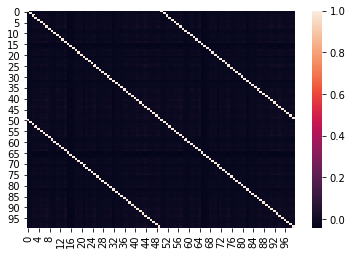

In [74]:
sns.heatmap(distance_matrix)

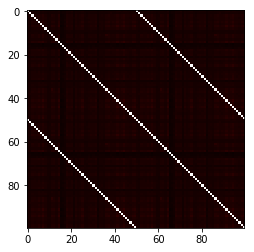

In [75]:
plt.imshow(distance_matrix, cmap='hot', interpolation='nearest')
plt.show()

In [76]:
YYY = Y

In [77]:
Z = np.zeros([99,4])
A = np.arange(0,100)
sz = np.ones(100)
cnt = 0
YYYY = YYY
def super_recursion():
    global YYY
    global A
    global sz
    global Z
    global cnt
    global YYYY
    if YYY.shape[0]==2:
        YYYY = YYY
    if YYY.shape[0]<=1:
        print(YYY)
        return ;
    sqa = np.square(YYY)
    sqa = np.sum(sqa,axis=1).tolist()
    square_roota = np.sqrt(sqa)
    YY=YYY/square_roota[:,None]
    distance_matrixa = YY.dot(YY.T)
    distance_matrixa = distance_matrixa.real
    np.fill_diagonal(distance_matrixa, -np.inf)
    i,j = np.unravel_index(distance_matrixa.argmax(),distance_matrixa.shape)
    one = YYY[i]
    two = YYY[j]
    avg = (one+two)/2.0
    Z[cnt,0] = A[i]
    Z[cnt,1] = A[j]
    Z[cnt,2] = distance_matrixa[i,j]
    Z[cnt,3] = sz[i] + sz[j]
    YYY[i] = avg
    YYY = np.delete(YYY,[j],axis=0)
    A[i] = cnt + 100
    A = np.delete(A,[j],axis=0)
    sz[i] = sz[i] + sz[j]
    sz = np.delete(sz,[j],axis=0)
    cnt+=1
    #print(YYY.shape)
    super_recursion()

In [78]:
super_recursion()

[[ 6.07635583e+00+0.00000000e+00j  5.79852837e+00+0.00000000e+00j
   5.48517000e+00+0.00000000e+00j  5.21114574e+00+0.00000000e+00j
  -7.98771362e+00+0.00000000e+00j -5.20805735e-02+0.00000000e+00j
  -1.23506723e-01+0.00000000e+00j  5.62537332e-01+0.00000000e+00j
   1.55890113e+00+0.00000000e+00j  1.38554017e+00+0.00000000e+00j
  -1.79041205e+00+0.00000000e+00j -1.09303217e-02+0.00000000e+00j
  -5.16381523e-01+0.00000000e+00j -1.18628318e+00+0.00000000e+00j
  -7.39467831e-01+0.00000000e+00j  1.69239294e+00+0.00000000e+00j
  -4.33334092e-01+0.00000000e+00j  2.05401388e+00+0.00000000e+00j
   4.07794369e-01+0.00000000e+00j -1.94625659e+00+0.00000000e+00j
   3.34480296e-01+0.00000000e+00j -6.08140745e-01+0.00000000e+00j
  -9.89615553e-02+0.00000000e+00j -1.23803200e-01+0.00000000e+00j
   8.03508346e-02+0.00000000e+00j -1.05967235e-01+0.00000000e+00j
   2.18882346e-02+0.00000000e+00j  4.05937878e-01+0.00000000e+00j
  -3.97014562e-01+0.00000000e+00j -3.05834077e-01+0.00000000e+00j
   6.09239

In [79]:
Z.shape

(99, 4)

In [80]:
for i in range(0,Z.shape[0]):
    Z[i,2] = 1.0 - Z[i,2]

In [81]:
for i in range(0,Z.shape[0]):
    if(Z[i,2]<0):
        Z[i,2]=0

In [82]:
Z

array([[2.00000000e+00, 5.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+00, 5.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.40000000e+01, 7.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.20000000e+01, 8.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.00000000e+00, 5.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 5.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.50000000e+01, 6.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+01, 7.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.10000000e+01, 7.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.60000000e+01, 7.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.90000000e+01, 7.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.80000000e+01, 8.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.30000000e+01, 9.30000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.80000000e+01, 9.80000000e+01, 0.00000000e

In [83]:
for i in range(0,Z.shape[0]):
    print("{}    {}   {}".format(Z[i,0],Z[i,1],Z[i,3]))

2.0    52.0   2.0
4.0    54.0   2.0
24.0    74.0   2.0
32.0    82.0   2.0
5.0    55.0   2.0
7.0    57.0   2.0
15.0    65.0   2.0
20.0    70.0   2.0
21.0    71.0   2.0
26.0    76.0   2.0
29.0    79.0   2.0
38.0    88.0   2.0
43.0    93.0   2.0
48.0    98.0   2.0
49.0    99.0   2.0
3.0    53.0   2.0
18.0    68.0   2.0
19.0    69.0   2.0
22.0    72.0   2.0
28.0    78.0   2.0
33.0    83.0   2.0
34.0    84.0   2.0
35.0    85.0   2.0
36.0    86.0   2.0
37.0    87.0   2.0
42.0    92.0   2.0
11.0    61.0   2.0
12.0    62.0   2.0
13.0    63.0   2.0
14.0    64.0   2.0
39.0    89.0   2.0
41.0    91.0   2.0
44.0    94.0   2.0
47.0    97.0   2.0
8.0    58.0   2.0
16.0    66.0   2.0
17.0    67.0   2.0
23.0    73.0   2.0
40.0    90.0   2.0
1.0    51.0   2.0
25.0    75.0   2.0
30.0    80.0   2.0
31.0    81.0   2.0
45.0    95.0   2.0
0.0    50.0   2.0
10.0    60.0   2.0
46.0    96.0   2.0
9.0    59.0   2.0
27.0    77.0   2.0
6.0    56.0   2.0
131.0    132.0   4.0
105.0    150.0   6.0
151.0    129.0   8

In [84]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [85]:
Z[0]

array([ 2., 52.,  0.,  2.])

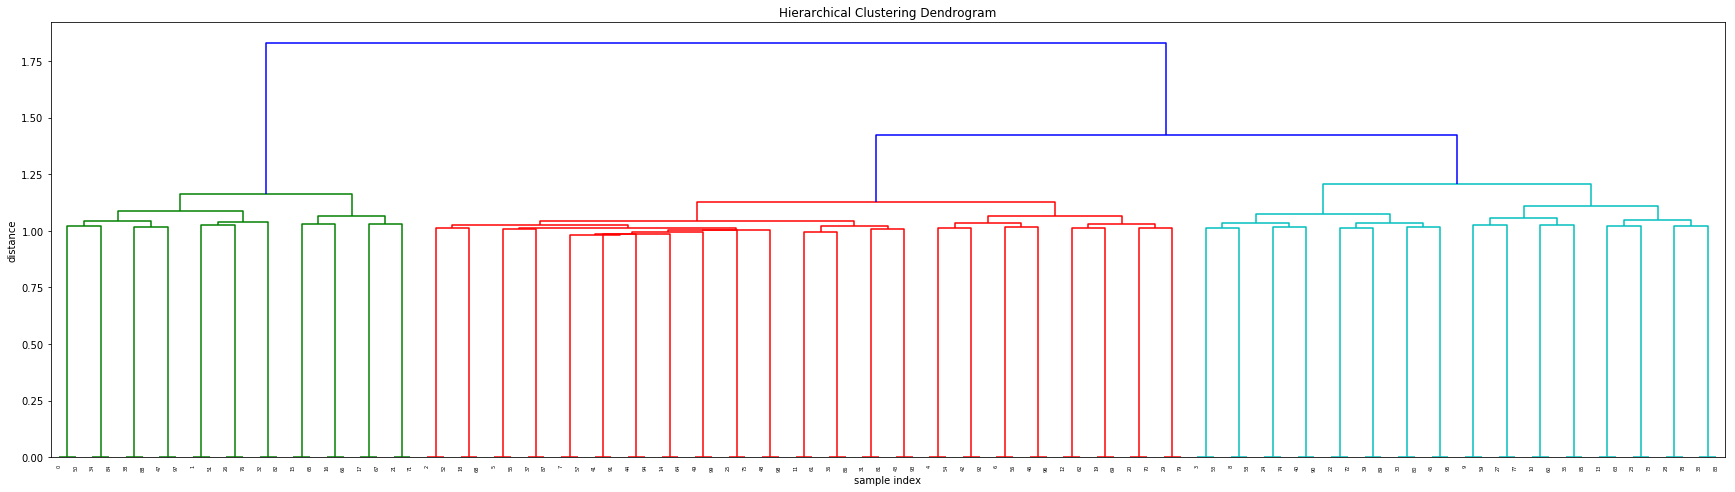

In [86]:
plt.figure(figsize=(30,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
   # leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [87]:
YYYY

array([[ 6.07635583e+00+0.00000000e+00j,  5.79852837e+00+0.00000000e+00j,
         5.48517000e+00+0.00000000e+00j,  5.21114574e+00+0.00000000e+00j,
        -7.98771362e+00+0.00000000e+00j, -5.20805735e-02+0.00000000e+00j,
        -1.23506723e-01+0.00000000e+00j,  5.62537332e-01+0.00000000e+00j,
         1.55890113e+00+0.00000000e+00j,  1.38554017e+00+0.00000000e+00j,
        -1.79041205e+00+0.00000000e+00j, -1.09303217e-02+0.00000000e+00j,
        -5.16381523e-01+0.00000000e+00j, -1.18628318e+00+0.00000000e+00j,
        -7.39467831e-01+0.00000000e+00j,  1.69239294e+00+0.00000000e+00j,
        -4.33334092e-01+0.00000000e+00j,  2.05401388e+00+0.00000000e+00j,
         4.07794369e-01+0.00000000e+00j, -1.94625659e+00+0.00000000e+00j,
         3.34480296e-01+0.00000000e+00j, -6.08140745e-01+0.00000000e+00j,
        -9.89615553e-02+0.00000000e+00j, -1.23803200e-01+0.00000000e+00j,
         8.03508346e-02+0.00000000e+00j, -1.05967235e-01+0.00000000e+00j,
         2.18882346e-02+0.00000000e+00

In [88]:
sqa = np.square(YYYY)
sqa = np.sum(sqa,axis=1).tolist()
square_roota = np.sqrt(sqa)
YY=YYYY/square_roota[:,None]

sqa1 = np.square(Y)
sqa1 = np.sum(sqa1,axis=1).tolist()
square_roota1 = np.sqrt(sqa1)
YY1=Y/square_roota1[:,None]

cluster_distance = YY.dot(YY1.T)
cluster_distance = cluster_distance.real
cluster_distance = 1 - cluster_distance
cluster_distance

array([[0.96006141, 0.94636114, 1.07982797, 1.07777953, 1.07669744,
        1.12370467, 1.07791544, 1.15792736, 1.07712764, 1.07395878,
        1.0734487 , 1.08027932, 1.07979417, 1.07451343, 1.15405797,
        0.54897461, 0.58751728, 0.63613308, 1.08025253, 1.07783396,
        1.07802055, 0.64548464, 1.07667446, 1.0751847 , 1.07656382,
        1.14237975, 0.94871412, 1.07433096, 1.07389077, 1.0768686 ,
        1.07453774, 1.08052167, 0.61718716, 1.07485955, 0.96061167,
        1.0734053 , 1.08038274, 1.12367132, 0.96928465, 1.07705253,
        1.0781226 , 1.15642805, 1.07865075, 1.08176996, 1.15430983,
        1.07817225, 1.0763021 , 0.96602077, 1.1234476 , 1.15316366,
        0.96006141, 0.94636114, 1.07982797, 1.07777953, 1.07669744,
        1.12370467, 1.07791544, 1.15792736, 1.07712764, 1.07395878,
        1.0734487 , 1.08027932, 1.07979417, 1.07451343, 1.15405797,
        0.54897461, 0.58751728, 0.63613308, 1.08025253, 1.07783396,
        1.07802055, 0.64548464, 1.07667446, 1.07

In [89]:
sum1 = 0
sum2 = 0
cnt1 = 0
cnt2 = 0
arr = np.zeros(100)
for i in range(0,100):
    d1 = cluster_distance[0][i]
    d2 = cluster_distance[1][i]
    
    if d1<=d2:
        sum1+=d1
        cnt1+=1
        arr[i] = 0
    else:
        sum2+=d2
        cnt2+=1
        arr[i] = 1

In [90]:
r1 = np.sqrt(sum1/cnt1)
r2 = np.sqrt(sum2/cnt2)

In [91]:
r1

0.8937332589962359

In [92]:
r2

0.9596822129470908

In [93]:
cnt1

22

In [94]:
cnt2

78

In [95]:
c=0;
for i in range(50,100):
    if(arr[i]==0):
        c=c+1
    

In [96]:
c

11

In [97]:
label=pd.DataFrame(arr)

In [98]:
frame_with_labels= pd.concat([df,label],axis=1)

In [99]:
frame_with_labels

,text,0
0,"[(rather, mary), (mary, railly), (railly, step...",0.0
1,"[(look, back), (sort, decision), (better, wors...",0.0
2,"[(must, tough), (tough, mob), (mob, boss), (as...",1.0
3,"[(capsule, earthy), (earthy, experimental), (e...",1.0
4,"[(jim, henson), (henson, passed), (passed, awa...",1.0
5,"[(movie, steven), (steven, spielberg), (spielb...",1.0
6,"[(quiz, show), (show, almost), (almost, perfec...",1.0
7,"[(first, thing), (cold, placed), (placed, minn...",1.0
8,"[(plot, group), (group, asbestos), (asbestos, ...",1.0
9,"[(coen, brothers), (homer, odyssey), (tale, th...",1.0


In [100]:
#min max
lst = []
for i in range(0,100):
    lst.append([i])



Z = np.zeros([99,4])
A = np.arange(0,100)
sz = np.ones(100)
cnt = 0
def min_max_rec():
    tlst=[]
    global Z
    global cnt
    global A
    global sz
    for i in range(0,len(lst)):
        for j in range(i+1,len(lst)):
            tem1=lst[i]
            tem2=lst[j]
            tem3=[]
            for item1 in range(0,len(tem1)):
                for item2 in range(0,len(tem2)):
                    tem3.append(distance_matrix[tem1[item1]][tem2[item2]])
            tem3.sort()
            avg=(tem3[0]+tem3[len(tem3)-1])/2
            tlst.append((avg,i,j))
    tlst.sort()
    new_cluster=[]
    frst_clus=tlst[0][1]
    scnd_clus=tlst[0][2]
    Z[cnt,0]=A[frst_clus]
    Z[cnt,1]=A[scnd_clus]
    Z[cnt,2]=tlst[0][0]
    Z[cnt,3]=sz[frst_clus]+sz[scnd_clus]
    new_cluster=lst[frst_clus]+lst[scnd_clus]
    lst.pop(scnd_clus)
    lst[frst_clus]=new_cluster
    
    #lst.append(new_cluster)
    
    print(lst)
    A[frst_clus] = cnt + 100
    A = np.delete(A,[scnd_clus],axis=0)
    sz[frst_clus] = sz[frst_clus] + sz[scnd_clus]
    sz = np.delete(sz,[scnd_clus],axis=0)
    cnt+=1
    if len(lst)==1:
        return;
    min_max_rec()

In [101]:
min_max_rec()

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15, 44], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99]]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15, 44], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65, 94], [66], [67], [68], [69]

[[0], [1, 9, 15, 44, 32, 17, 21, 27, 10], [2], [3], [4], [5], [6], [7, 16], [8], [11], [12], [13], [14], [18], [19], [20], [22], [23], [24], [25], [26], [28], [29], [30], [31], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [45], [46], [47], [48], [49], [50], [51, 59, 65, 94, 82, 67, 71, 77], [52], [53], [54], [55], [56], [57, 66], [58], [60], [61], [62], [63], [64], [68], [69], [70], [72], [73], [74], [75], [76], [78], [79], [80], [81], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [95], [96], [97], [98], [99]]
[[0], [1, 9, 15, 44, 32, 17, 21, 27, 10], [2], [3], [4], [5], [6], [7, 16], [8], [11], [12], [13], [14], [18], [19], [20], [22], [23], [24], [25], [26], [28], [29], [30], [31], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [45], [46], [47], [48], [49], [50], [51, 59, 65, 94, 82, 67, 71, 77, 60], [52], [53], [54], [55], [56], [57, 66], [58], [61], [62], [63], [64], [68], [69], [70], [72], [73], [74], [75], [76], [78], [7

[[0, 1, 9, 15, 44, 32, 17, 21, 27, 10, 35, 23, 33, 13, 28], [2], [3], [4], [5], [6], [7, 16, 26, 34, 47], [8], [11], [12], [14], [18], [19], [20], [22], [24], [25], [29], [30], [31], [36], [37], [38], [39], [40], [41], [42], [43], [45], [46], [48], [49], [50, 51, 59, 65, 94, 82, 67, 71, 77, 60, 85, 73, 83, 63, 78], [52], [53], [54], [55], [56], [57, 66, 76, 84], [58], [61], [62], [64], [68], [69], [70], [72], [74], [75], [79], [80], [81], [86], [87], [88], [89], [90], [91], [92], [93], [95], [96], [97], [98], [99]]
[[0, 1, 9, 15, 44, 32, 17, 21, 27, 10, 35, 23, 33, 13, 28], [2], [3], [4], [5], [6], [7, 16, 26, 34, 47], [8], [11], [12], [14], [18], [19], [20], [22], [24], [25], [29], [30], [31], [36], [37], [38], [39], [40], [41], [42], [43], [45], [46], [48], [49], [50, 51, 59, 65, 94, 82, 67, 71, 77, 60, 85, 73, 83, 63, 78], [52], [53], [54], [55], [56], [57, 66, 76, 84, 97], [58], [61], [62], [64], [68], [69], [70], [72], [74], [75], [79], [80], [81], [86], [87], [88], [89], [90], [9

In [102]:
for i in range(0,Z.shape[0]):
    Z[i,2] = 1 - Z[i,2]

In [103]:
mn=Z[0,2]
for i in range(0,Z.shape[0]):
    if(Z[i,2]<mn):
        mn=Z[i,2]
mn=abs(mn)

In [104]:
for i in range(0,Z.shape[0]):
    Z[i,2]=Z[i,2]+mn

In [105]:
Z

array([[ 15.        ,  44.        ,   1.56485262,   2.        ],
       [ 65.        ,  94.        ,   1.56485262,   2.        ],
       [  7.        ,  16.        ,   1.55691107,   2.        ],
       [ 57.        ,  66.        ,   1.55691107,   2.        ],
       [100.        ,  32.        ,   1.55409706,   3.        ],
       [101.        ,  82.        ,   1.55409706,   3.        ],
       [104.        ,  17.        ,   1.55293135,   4.        ],
       [105.        ,  67.        ,   1.55293135,   4.        ],
       [106.        ,  21.        ,   1.55161357,   5.        ],
       [107.        ,  71.        ,   1.55161357,   5.        ],
       [  9.        , 108.        ,   1.54974923,   6.        ],
       [ 59.        , 109.        ,   1.54974923,   6.        ],
       [  1.        , 110.        ,   1.54957016,   7.        ],
       [ 51.        , 111.        ,   1.54957016,   7.        ],
       [112.        ,  27.        ,   1.54914151,   8.        ],
       [113.        ,  77

In [106]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [107]:
Z[0]

array([15.        , 44.        ,  1.56485262,  2.        ])

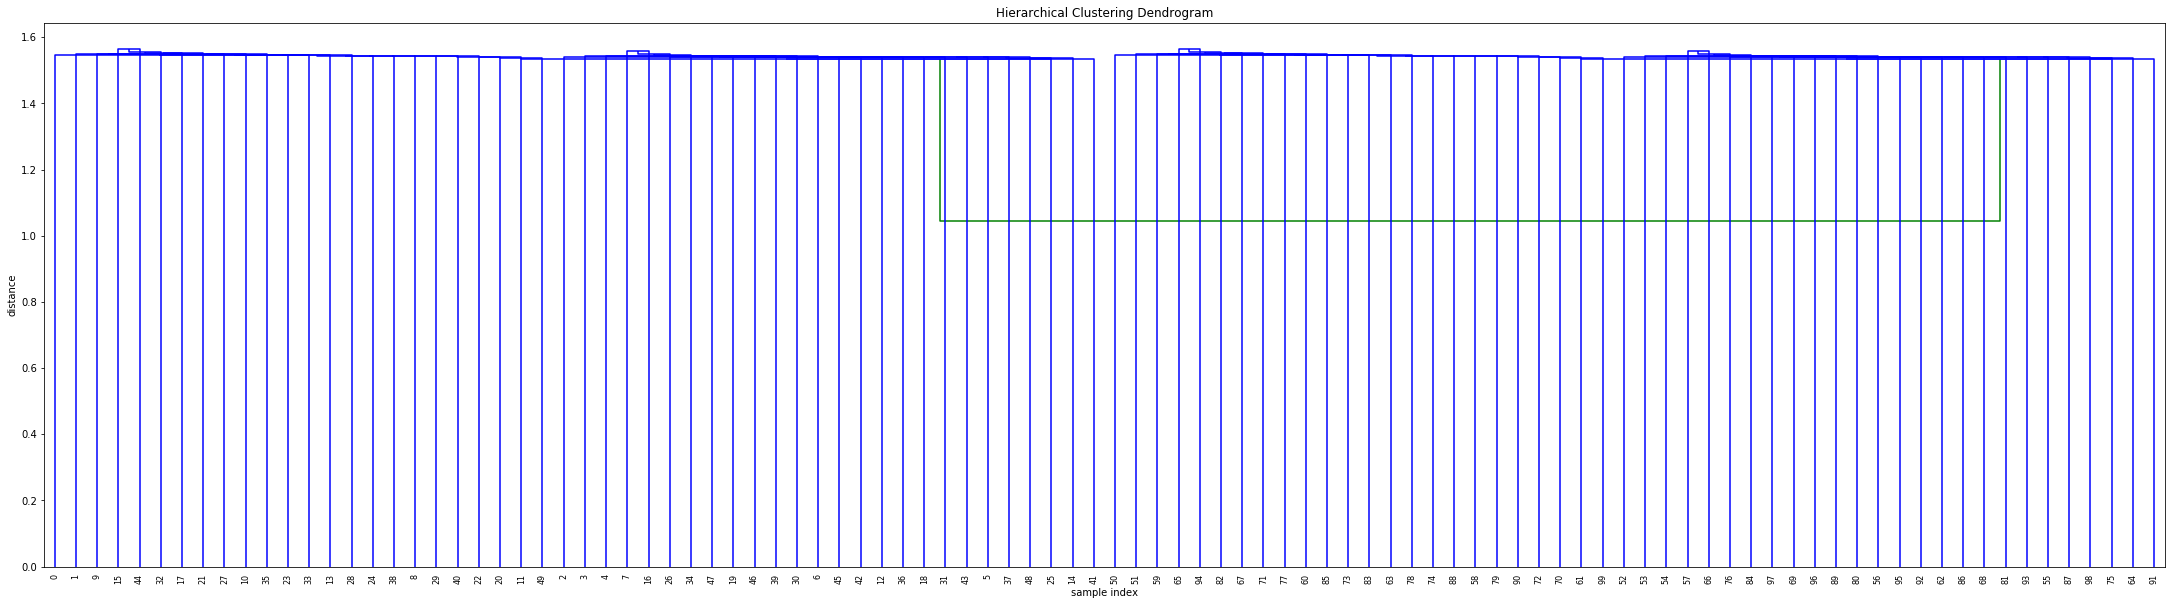

In [108]:
plt.figure(figsize=(38,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    orientation='top',
)
plt.show()

In [109]:
#min max with outer boundary 1.25 radius
lst = []
for i in range(0,100):
    lst.append([i])



Z = np.zeros([99,4])
A = np.arange(0,100)
sz = np.ones(100)
cnt = 0
def min_max_rec_1():
    tlst=[]
    global Z
    global cnt
    global A
    global sz
    for i in range(0,len(lst)):
        for j in range(i+1,len(lst)):
            
            tem1=lst[i]
            tem2=lst[j]
            
            temp1=[]
            if len(tem1)>=3:
                sm1=np.zeros(100);
                for ii in tem1:
                    sm1=sm1+Y[ii]    
                sm1=sm1/len(tem1)
                rad1=0
                dis1=[]
                for ii in tem1:
                    dis1.append(sum((Y[ii]-sm1)*(Y[ii]-sm1)))
                    rad1=rad1+dis1[len(dis1)-1]                
                rad1=rad1/len(tem1)
                for ii in range(0,len(tem1)):
                    if dis1[ii] > 1.25*rad1:
                        temp1.append(tem1[ii])
            else:
                temp1=tem1
                    
            temp2=[]
            if len(tem2)>=3:
                sm2=np.zeros(100);
                for ii in tem2:
                    sm2=sm2+Y[ii]    
                sm2=sm2/len(tem2)
                rad2=0
                dis2=[]
                for ii in tem2:
                    dis2.append(sum((Y[ii]-sm2)*(Y[ii]-sm2)))
                    rad2=rad2+dis2[len(dis2)-1]                
                rad2=rad2/len(tem2)
                for ii in range(0,len(tem2)):
                    if dis2[ii] > 1.25*rad2:
                        temp2.append(tem2[ii])
            else:
                temp2=tem2
                
            
            tem3=[]
            for item1 in range(0,len(temp1)):
                for item2 in range(0,len(temp2)):
                    tem3.append(distance_matrix[temp1[item1]][temp2[item2]])
            tem3.sort()
            avg=(tem3[0]+tem3[len(tem3)-1])/2
            tlst.append((avg,i,j))
            
    tlst.sort()
    new_cluster=[]
    frst_clus=tlst[0][1]
    scnd_clus=tlst[0][2]
    Z[cnt,0]=A[frst_clus]
    Z[cnt,1]=A[scnd_clus]
    Z[cnt,2]=tlst[0][0]
    Z[cnt,3]=sz[frst_clus]+sz[scnd_clus]
    new_cluster=lst[frst_clus]+lst[scnd_clus]
    lst.pop(scnd_clus)
    lst[frst_clus]=new_cluster
    
    #lst.append(new_cluster)
    
    print(lst)
    A[frst_clus] = cnt + 100
    A = np.delete(A,[scnd_clus],axis=0)
    sz[frst_clus] = sz[frst_clus] + sz[scnd_clus]
    sz = np.delete(sz,[scnd_clus],axis=0)
    cnt+=1
    if len(lst)==1:
        return;
    min_max_rec_1()

In [110]:
min_max_rec_1()

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15, 44], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99]]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15, 44], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65, 94], [66], [67], [68], [69]

[[0], [1], [2], [3], [4], [5, 7, 16, 14, 15, 44, 32, 41, 91, 64, 49, 99, 25, 75, 37, 87, 55, 43, 93, 48, 98], [6], [8], [9], [10], [11], [12], [13], [17], [18], [19], [20], [21], [22], [23], [24], [26], [27], [28], [29], [30], [31], [33], [34], [35], [36], [38], [39], [40], [42], [45], [46], [47], [50], [51], [52], [53], [54], [56], [57, 66], [58], [59], [60], [61], [62], [63], [65, 94], [67], [68], [69], [70], [71], [72], [73], [74], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [88], [89], [90], [92], [95], [96], [97]]
[[0], [1], [2], [3], [4], [5, 7, 16, 14, 15, 44, 32, 41, 91, 64, 49, 99, 25, 75, 37, 87, 55, 43, 93, 48, 98, 18], [6], [8], [9], [10], [11], [12], [13], [17], [19], [20], [21], [22], [23], [24], [26], [27], [28], [29], [30], [31], [33], [34], [35], [36], [38], [39], [40], [42], [45], [46], [47], [50], [51], [52], [53], [54], [56], [57, 66], [58], [59], [60], [61], [62], [63], [65, 94], [67], [68], [69], [70], [71], [72], [73], [74], [76], [77], [78]

[[0], [1], [2, 5, 7, 16, 14, 15, 44, 32, 41, 91, 64, 49, 99, 25, 75, 37, 87, 55, 43, 93, 48, 98, 18, 68, 31, 81, 20, 70, 11, 61, 52, 12, 62, 86, 8, 58, 42, 92, 3, 53, 19, 69, 29, 79, 6, 56, 40], [4], [9], [10], [13], [17], [21], [22], [23], [24], [26], [27], [28], [30], [33], [34], [35], [36, 65, 94, 82, 57, 66], [38], [39], [45], [46], [47], [50], [51], [54], [59], [60], [63], [67], [71], [72], [73], [74], [76], [77], [78], [80], [83], [84], [85], [88], [89], [90], [95], [96], [97]]
[[0], [1], [2, 5, 7, 16, 14, 15, 44, 32, 41, 91, 64, 49, 99, 25, 75, 37, 87, 55, 43, 93, 48, 98, 18, 68, 31, 81, 20, 70, 11, 61, 52, 12, 62, 86, 8, 58, 42, 92, 3, 53, 19, 69, 29, 79, 6, 56, 40, 90], [4], [9], [10], [13], [17], [21], [22], [23], [24], [26], [27], [28], [30], [33], [34], [35], [36, 65, 94, 82, 57, 66], [38], [39], [45], [46], [47], [50], [51], [54], [59], [60], [63], [67], [71], [72], [73], [74], [76], [77], [78], [80], [83], [84], [85], [88], [89], [95], [96], [97]]
[[0], [1], [2, 5, 7, 16,

In [111]:
for i in range(0,Z.shape[0]):
    Z[i,2] = 1 - Z[i,2]

In [112]:
mn=Z[0,2]
for i in range(0,Z.shape[0]):
    if(Z[i,2]<mn):
        mn=Z[i,2]
mn=abs(mn)

In [113]:
for i in range(0,Z.shape[0]):
    Z[i,2]=Z[i,2]+mn

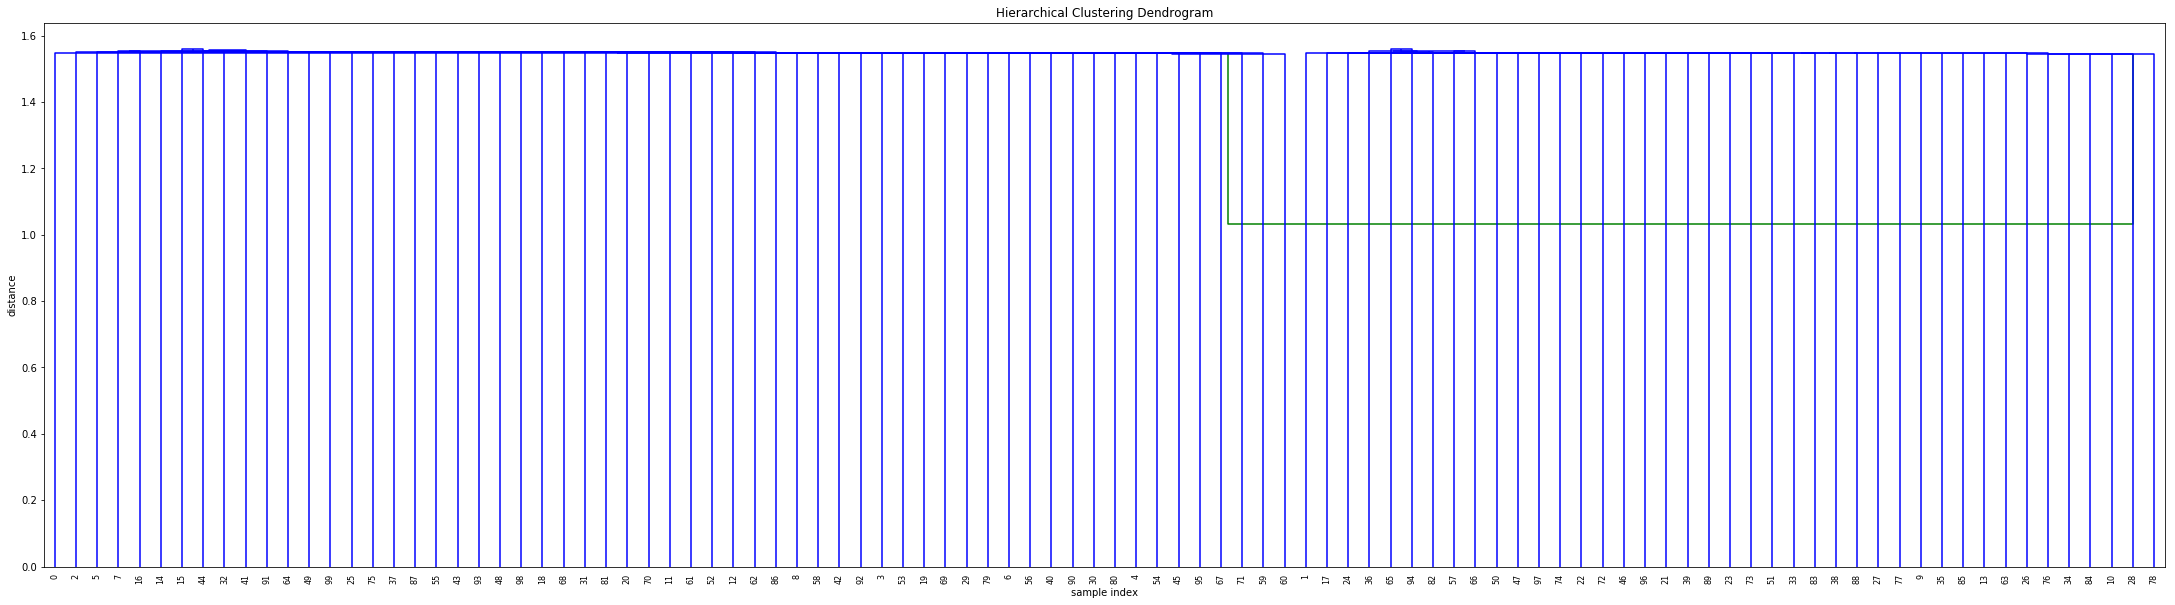

In [114]:
plt.figure(figsize=(38,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    orientation='top',
)
plt.show()